# Zestaw zadań: Kwadratury
## Zadanie 1
### Autor: Artur Gęsiarz

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz, simps
from warnings import filterwarnings

In [122]:
filterwarnings("ignore", category=DeprecationWarning)

### Funkcja do calkowania

In [123]:
def function_to_integrate(x):
    return 4 / (1 + x ** 2)

### Funkcja obliczajca wartosc pi za pomoca calki

In [124]:
def calculate_pi_integral(method, x, y):
    integral_value = method(y, x)
    return integral_value

### Funkcja obliczajca blad wzgledny

In [125]:
def relative_error(excat, approx):
    return np.abs((excat - approx) / excat)

### Lista do przechowywania bledow wzglednych dla kazdej z metod

In [126]:
errors_trapezoidal = []
errors_simpson = []

### Przedzial calkowania

In [127]:
a = 0
b = 1

### Zakres wartosci m

In [128]:
m_values = np.arange(1, 26)

### Pętla po wartosciach m

In [129]:
for m in m_values:
    # Generowanie węzlów
    x = np.linspace(a, b, 2 ** m + 1)
    y = function_to_integrate(x)

    exact_value = np.pi

    integral_trapezoidal = calculate_pi_integral(trapz, x, y)
    integral_simpson = calculate_pi_integral(simps, x, y)

    error_trapezoidal = relative_error(exact_value, integral_trapezoidal)
    error_simpson = relative_error(exact_value, integral_simpson)

    errors_simpson.append(error_simpson)
    errors_trapezoidal.append(error_trapezoidal)

### Tworzenie wykresu

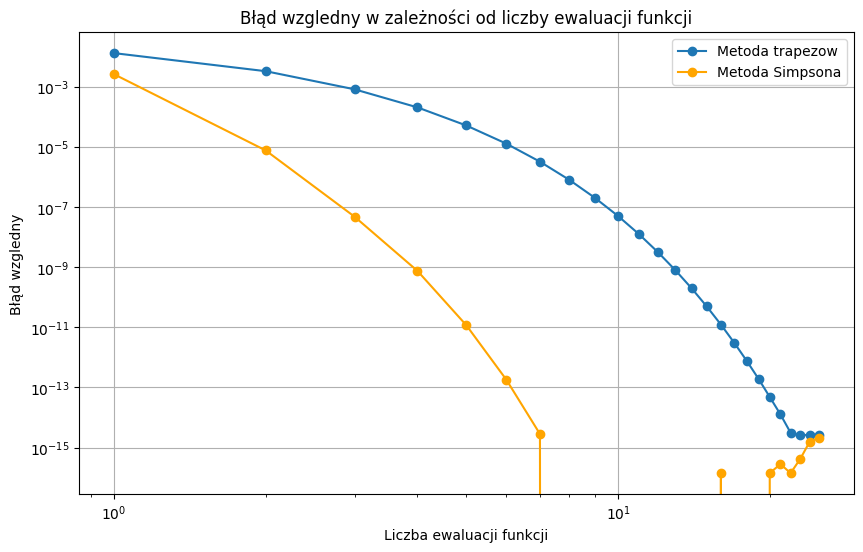

In [130]:
plt.figure(figsize=(10,6))
plt.plot(m_values, errors_trapezoidal, label='Metoda trapezow', marker='o')
plt.plot(m_values, errors_simpson, label='Metoda Simpsona', marker='o',color='orange')
plt.xscale('log')
plt.yscale('log')
plt.title('Błąd wzgledny w zależności od liczby ewaluacji funkcji')
plt.xlabel('Liczba ewaluacji funkcji')
plt.ylabel('Błąd wzgledny')
plt.legend()
plt.grid(True)
plt.show()

# poprawic wykres !! - skala
# wykres metody prosotkatow - na 4 na jedynm wykresie
# metoda Simpsona do poprawy 

### Wyświetlanie danych

In [131]:
m = 1
for error_trapezional in errors_trapezoidal:
    print(f"Error trapezional for {m} -> equals: {error_trapezional}")
    m += 1

m = 1
for error_simpson in errors_simpson:
    print(f"Error Simpson for {m} -> equals: {error_simpson}")
    m += 1

Error trapezional for 1 -> equals: 0.013239352830248852
Error trapezional for 2 -> equals: 0.0033155740256952146
Error trapezional for 3 -> equals: 0.0008289295863128951
Error trapezional for 4 -> equals: 0.00020723296117346922
Error trapezional for 5 -> equals: 5.180824911615532e-05
Error trapezional for 6 -> equals: 1.2952062416862866e-05
Error trapezional for 7 -> equals: 3.238015606336086e-06
Error trapezional for 8 -> equals: 8.095039015840215e-07
Error trapezional for 9 -> equals: 2.023759753606659e-07
Error trapezional for 10 -> equals: 5.0593993804826974e-08
Error trapezional for 11 -> equals: 1.2648498415867247e-08
Error trapezional for 12 -> equals: 3.1621244272693295e-09
Error trapezional for 13 -> equals: 7.905312481753182e-10
Error trapezional for 14 -> equals: 1.9763274136483664e-10
Error trapezional for 15 -> equals: 4.940829135969854e-11
Error trapezional for 16 -> equals: 1.235186080294587e-11
Error trapezional for 17 -> equals: 3.0879652007364677e-12
Error trapezional

### Obliczenie h_min

In [132]:
def calculate_hmin(method):
    h = 1.0
    previous_error = 1.0

    while True:
        x = np.linspace(0, 1, int(1 / h) + 1)
        y = function_to_integrate(x)

        exact_value = np.pi
        integral_value = method(y, x)
        error = relative_error(exact_value, integral_value)

        if error >= previous_error or np.isnan(error):
            break

        previous_error = error
        h /= 2

    return h

### Obliczenie wartości ponizęj ktorej zmniejsze kroku h nie zmniejsza juz bledu kwadratury dla metody trapezow

In [133]:
h_min_trapezoidal = calculate_hmin(trapz)
print("H_min dla metody trapezow wynosi:",h_min_trapezoidal)

H_min dla metody trapezow wynosi: 5.960464477539063e-08


### Obliczenie wartości ponizęj ktorej zmniejsze kroku h nie zmniejsza juz bledu kwadratury dla metody Simpsona

In [134]:
h_min_Simpson = calculate_hmin(simps)
print("H_min dla metody Simpsona wynosi:",h_min_Simpson)

H_min dla metody Simpsona wynosi: 0.001953125


### Obliczenie błędu numerycznego dladanej metody i wartości h

In [135]:
def calculate_error(method, h):
    x = np.linspace(0, 1, int(1 / h) + 1)
    y = function_to_integrate(x)

    exact_value = np.pi
    integral_value = method(y, x)

    error = np.abs((exact_value - integral_value) / exact_value)

    return error

### Obliczanie rzędu zbieżności

In [136]:
def calculate_convergence_order(errors, hs):
    p_values = []

    for i in range(len(errors) - 1):
        if errors[i] == 0 or errors[i+1] == 0:
            continue
        p = np.log(errors[i+1] / errors[i]) / np.log(hs[i+1] / hs[i])
        p_values.append(p)

    return p_values

### Zakres wartosci h

In [137]:
hs = np.logspace(-5, -1, 100)

### Obliczenie błędów numerycznych dla każdej metody

In [138]:
errors_trapezoidal_empi = [calculate_error(trapz, h) for h in hs]
errors_simpson_empi = [calculate_error(simps, h) for h in hs]

### Obliczenie rzędu zbieżności dla kazej metody

In [139]:
p_values_trapezoidal = calculate_convergence_order(errors_trapezoidal_empi, hs)
p_values_Simpson = calculate_convergence_order(errors_simpson_empi, hs)

### Wyświetlanie wynikow

In [140]:
print("Rząd zbieznosci dla metody trapezów: ",np.mean(p_values_trapezoidal))
print("Rząd zbieznosci dla metody Simpsona: ",np.mean(p_values_Simpson))

Rząd zbieznosci dla metody trapezów:  1.999999861768364
Rząd zbieznosci dla metody Simpsona:  3.0734249145794035
